As a data professional working for a pharmaceutical company, you need to develop a
model that predicts whether a patient will be diagnosed with diabetes. The model needs
to have an accuracy score greater than 0.85.
You will be required to document the following steps:

● Data Importation

● Data Exploration

● Data Cleaning

● Data Preparation

● Data Modeling (Using Decision Trees, Random Forest and Logistic Regression)

● Model Evaluation

● Hyparameter Tuning

● Findings and Recommendations
Dataset

● Dataset URL: https://bit.ly/DiabetesDS
Project Source: https://bit.ly/3CU4b7d

In [30]:
#Data Importation
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
df = pd.read_csv('https://bit.ly/DiabetesDS ')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Data Exploration

df.shape

(768, 9)

In [ ]:
df.describe()

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
print("Number of 0's for Glucose:", df['Glucose'].isin([0]).sum())
print("Number of 0's for Blood Pressure:", df['BloodPressure'].isin([0]).sum())
print("Number of 0's for Skin Thickness:", df['SkinThickness'].isin([0]).sum())
print("Number of 0's for Insulin:", df['Insulin'].isin([0]).sum())
print("Number of 0's for BMI:", df['BMI'].isin([0]).sum())

Number of 0's for Glucose: 5
Number of 0's for Blood Pressure: 35
Number of 0's for Skin Thickness: 227
Number of 0's for Insulin: 374
Number of 0's for BMI: 11


In [ ]:
#Data Cleaning
df_clean = df.copy()

df_clean['Glucose'] = df_clean['Glucose'].replace(0,df['Glucose'].mean())
df_clean['BloodPressure'] = df_clean['BloodPressure'].replace(0,df['BloodPressure'].mean())
df_clean['SkinThickness'] = df_clean['SkinThickness'].replace(0,df['SkinThickness'].mean())
df_clean['Insulin'] = df_clean['Insulin'].replace(0,df['Insulin'].mean())
df_clean['BMI'] = df_clean['BMI'].replace(0,df['BMI'].mean())



In [ ]:
df_clean['Pregnancies'].values[df_clean['Pregnancies'] > 0] = 1
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.855469,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,0.351857,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,1.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,1.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Data Preparation

df_clean.groupby(['Outcome']).count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [ ]:
df_clean.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,-0.017816,-0.038159,-0.067654,-0.008117,-0.161757,-0.060780,0.197159,0.005705
Glucose,-0.017816,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,-0.038159,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,-0.067654,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.008117,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,-0.161757,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.060780,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.197159,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.005705,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


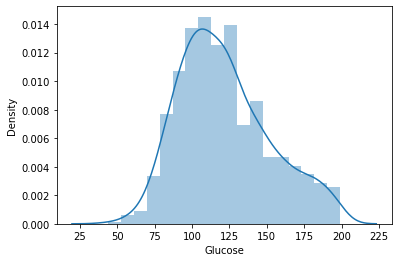

In [ ]:
sns.distplot(df_clean['Glucose'],kde=True);


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


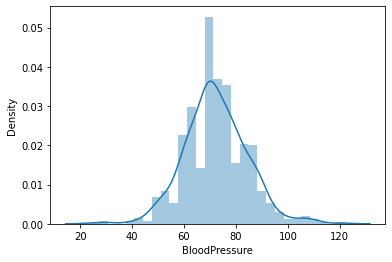

In [ ]:
sns.distplot(df_clean['BloodPressure'],kde=True);


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


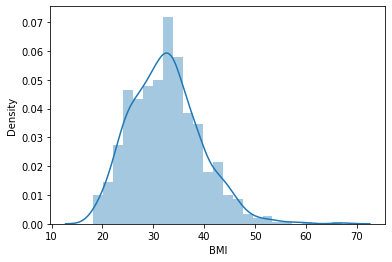

In [ ]:
sns.distplot(df_clean['BMI'],kde=True);

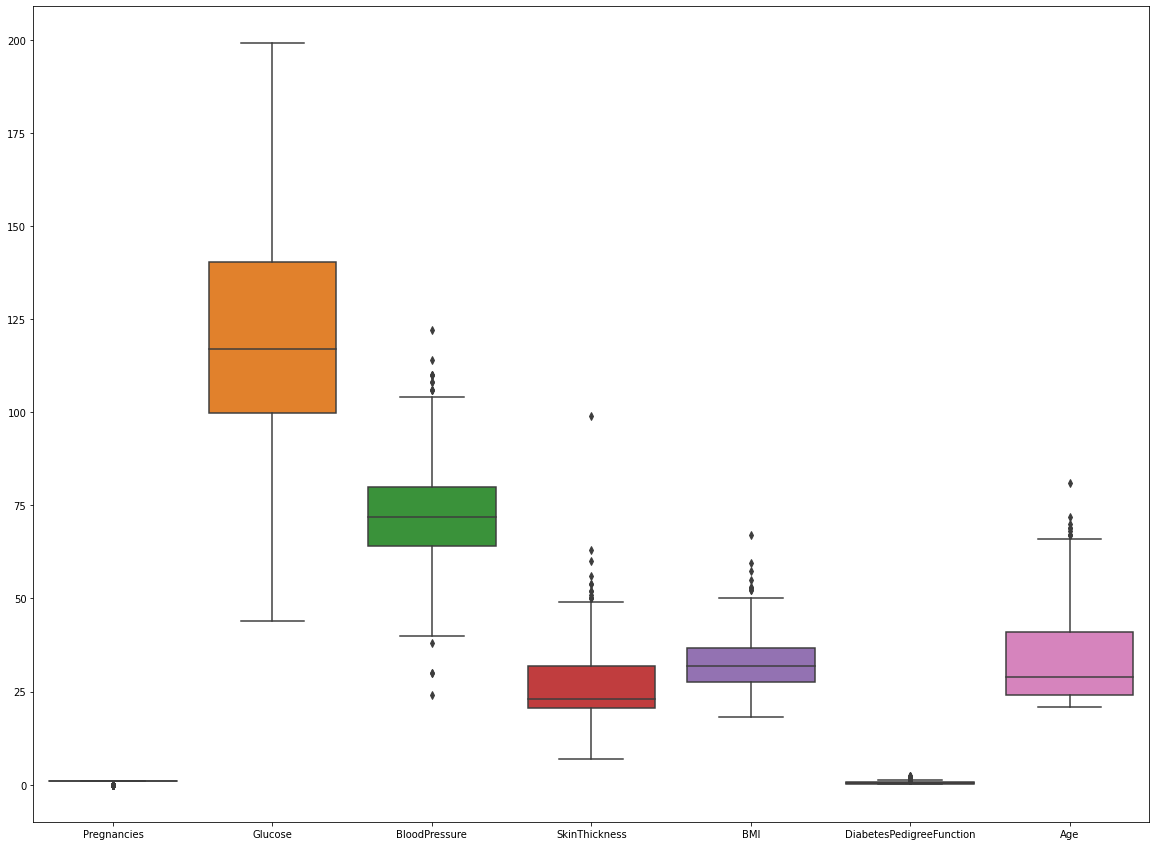

In [26]:
#See outliers
plt.subplots(figsize=(20,15))
sns.boxplot(data=df_clean.drop(['Insulin','Outcome'],axis=1));

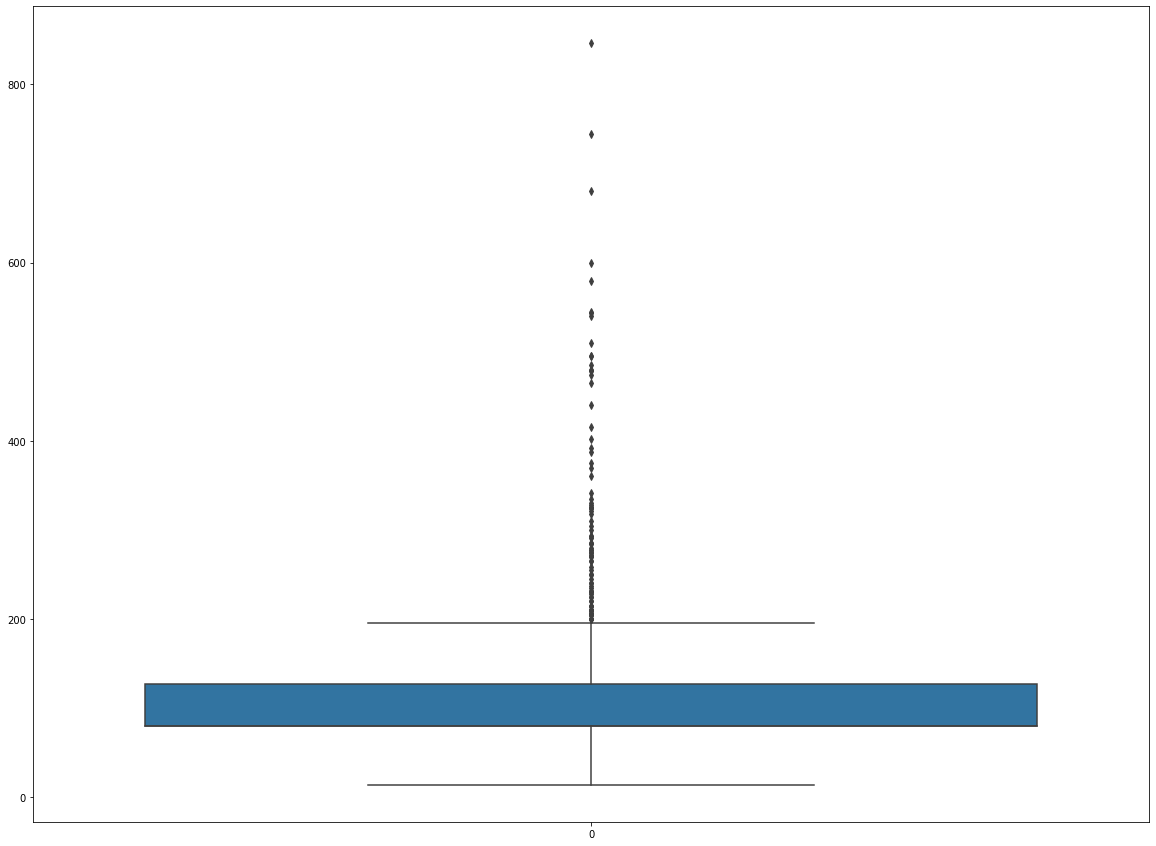

In [28]:
# Insulin has high number of outliers 
plt.subplots(figsize=(20,15))
sns.boxplot(data=df_clean['Insulin']);

In [31]:
 #Modeling 

x=df_clean.drop('Outcome',axis=1)
y=df_clean['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=1)
type(x_train)

model=LogisticRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
model_score=model.score(x_test,y_test)
print('Accuracy = ',model_score)
print(metrics.confusion_matrix(y_test,y_predict))

Accuracy =  0.7760416666666666
[[107  16]
 [ 27  42]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [33]:
#Hyparameter Tuning
from sklearn import preprocessing

x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)

model=LogisticRegression()
model.fit(x_train_scaled,y_train)
y_predict=model.predict(x_test_scaled)
model_score=model.score(x_test_scaled,y_test)
print('Accuracy = ',model_score)
print(metrics.confusion_matrix(y_test,y_predict))

Accuracy =  0.7708333333333334
[[108  15]
 [ 29  40]]


Observation

Model without scaling gave better accuracy hence we will review results of first model

Logistic Regression with Train and Test ratio of 75:25
Analyzing the confusion matrix
True Positives (TP): we correctly predicted that 42 patients Diabetes.

True Negatives (TN): we correctly predicted that 110 patients DO NOT have Diabetes.

False Positives (FP): we incorrectly predicted that 13 patients have Diabetes (a "Type I error") Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that 27 patients DO NOT have Diabetes (a "Type II error") Falsely predict negative Type II error

Accuracy Score of the Model is 77.60%

 